<a href="https://colab.research.google.com/github/MihaelaCatan04/Sigmoid-Homeworl/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic - Machine Learning from Disaster

In [ ]:
#connect to google drive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
#connect to kaggle
!mkdir -p ~/.kaggle
!cp drive/MyDrive/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download the dataset
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip dataset
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read data
data = pd.read_csv("/content/train.csv")

In [ ]:
#print the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#get the shape of the dataframe
data.shape

(891, 12)

In [ ]:
#get the number of NaN values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Univariate Analysis

In [ ]:
#get the count, mean, std of the dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#the id doesn't provide any useful information
data.drop(columns=["PassengerId"], axis=1, inplace=True)
#select the numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

In [ ]:
#check data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Mean
mean_values = data[numerical_columns].mean()

#Median
median_values = data[numerical_columns].median()

#Mode
mode_values = data[numerical_columns].mode().iloc[0]

#Standard Deviation
standard_deviation_values = data[numerical_columns].std()

#Variance
variance_values = data[numerical_columns].var()

#Range
range_values = data[numerical_columns].max() - data[numerical_columns].min()

#Print results
print("\nMean Values:")
print(mean_values)
print("\nMedian Values:")
print(median_values)
print("\nMode Values:")
print(mode_values)
print("\nStandard Deviation Values:")
print(standard_deviation_values)
print("\nVariance Values:")
print(variance_values)
print("\nRange Values:")
print(range_values)


Mean Values:
Survived     0.383838
Pclass       2.308642
Age         29.699118
SibSp        0.523008
Parch        0.381594
Fare        32.204208
dtype: float64

Median Values:
Survived     0.0000
Pclass       3.0000
Age         28.0000
SibSp        0.0000
Parch        0.0000
Fare        14.4542
dtype: float64

Mode Values:
Survived     0.00
Pclass       3.00
Age         24.00
SibSp        0.00
Parch        0.00
Fare         8.05
Name: 0, dtype: float64

Standard Deviation Values:
Survived     0.486592
Pclass       0.836071
Age         14.526497
SibSp        1.102743
Parch        0.806057
Fare        49.693429
dtype: float64

Variance Values:
Survived       0.236772
Pclass         0.699015
Age          211.019125
SibSp          1.216043
Parch          0.649728
Fare        2469.436846
dtype: float64

Range Values:
Survived      1.0000
Pclass        2.0000
Age          79.5800
SibSp         8.0000
Parch         6.0000
Fare        512.3292
dtype: float64


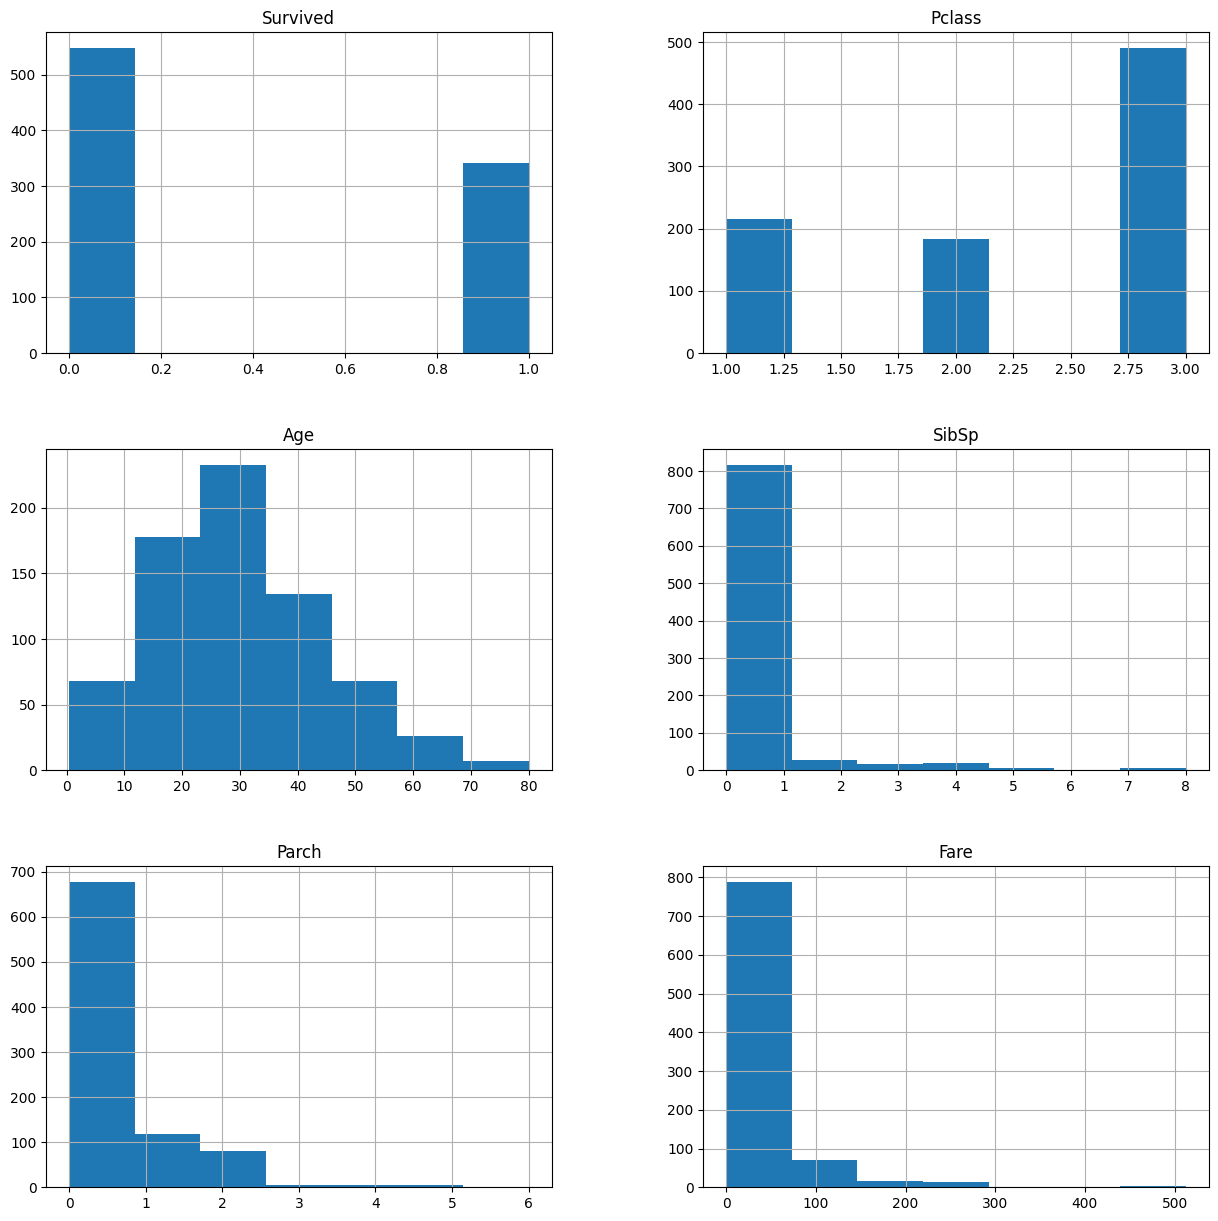

In [ ]:
data.hist(bins=7, figsize=(15, 15))
plt.show()

# Multivariate Analysis

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Pclass', ylabel='Survived'>

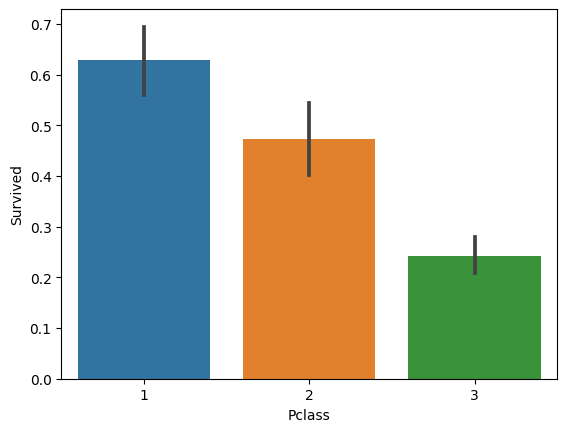

In [ ]:
#see how many people survived from each class
sns.barplot(x=data['Pclass'], y=data['Survived'])

<Axes: xlabel='Sex', ylabel='Survived'>

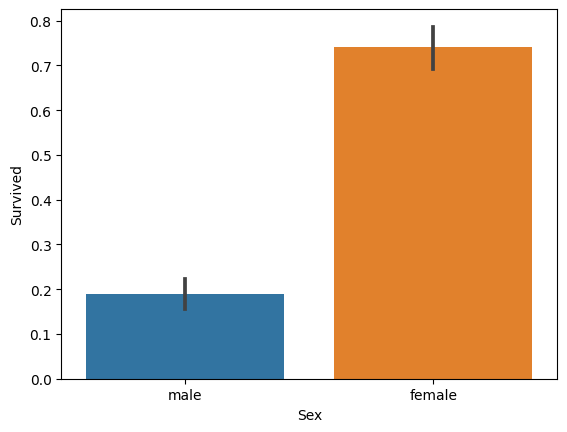

In [ ]:
#see how many makes and females survived from each class
sns.barplot(x=data['Sex'], y=data['Survived'])

<Axes: xlabel='SibSp', ylabel='Survived'>

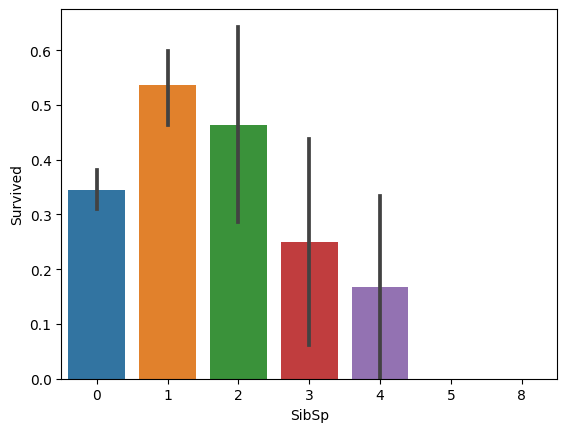

In [ ]:
#see how many siblings/spouses were aboard Titanic
sns.barplot(x=data['SibSp'], y=data['Survived'])

<Axes: xlabel='Parch', ylabel='Survived'>

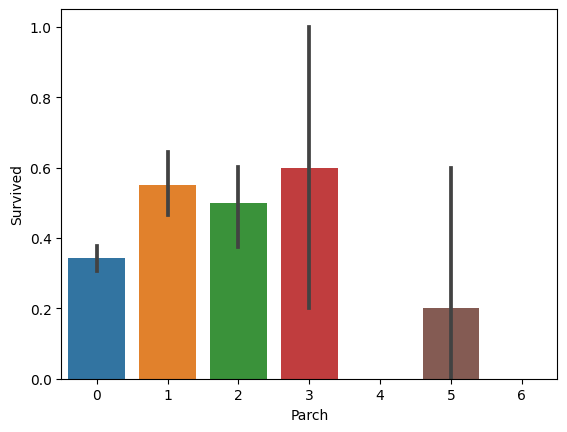

In [ ]:
#see how many children/parents were aboard Titanic
sns.barplot(x=data['Parch'], y=data['Survived'])

<Axes: xlabel='Fare', ylabel='Survived'>

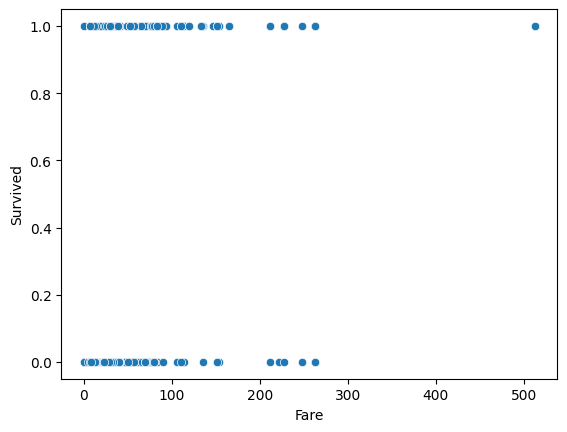

In [ ]:
#see whether there is a relationship between the fare and the survival rate on Titanic
sns.scatterplot(x=data['Fare'], y=data['Survived'])

<Axes: xlabel='Embarked', ylabel='Survived'>

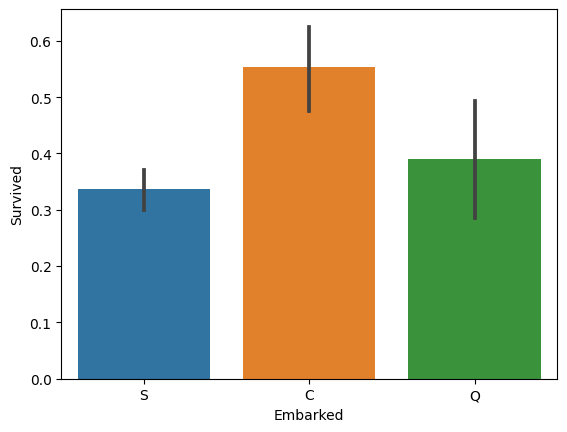

In [ ]:
#see how many survivors were from each place they embarked
sns.barplot(x=data['Embarked'], y=data['Survived'])

<ipython-input-84-f75d85693d07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

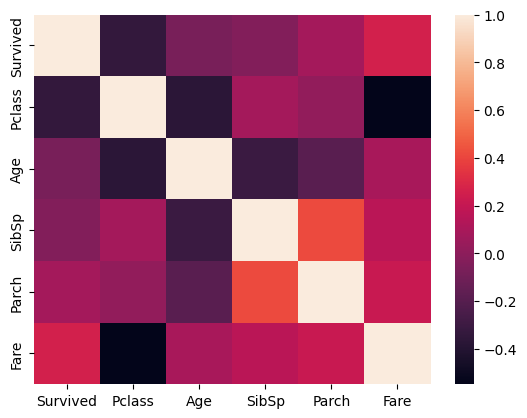

In [ ]:
#see correlation
sns.heatmap(data.corr())

#Conclusion


**Survival Rate:**

The mean survival rate is approximately 38.38%, indicating that a significant portion of passengers did not survive the Titanic disaster. The median survival rate of 0% suggests that the majority of passengers in the dataset did not survive.

**Passenger Class (Pclass):**

The mean passenger class is around 2.31, with a negative correlation (-0.338481) between passenger class and survival. This indicates that higher-class passengers (lower Pclass values) had a higher chance of survival.

**Age:**

The mean age is approximately 29.70, and the median age is 28. The age distribution has a standard deviation of 14.53, suggesting a relatively wide range of ages among passengers. The negative correlation (-0.077221) between age and survival suggests a slight tendency for younger passengers to have a higher chance of survival.

**Siblings/Spouses (SibSp) and Parents/Children (Parch):**

The mean values for SibSp and Parch indicate that, on average, passengers had fewer than one sibling/spouse or parent/child aboard. The correlation between SibSp and Parch is positive (0.414838), indicating that passengers with more siblings/spouses tended to have more parents/children aboard.

**Fare:**

The mean fare is 32.20, with a high standard deviation of 49.69, suggesting a wide range of ticket prices. The negative correlation (-0.549500) between passenger class (Pclass) and fare indicates that higher-class passengers paid higher fares.

**Correlation Matrix:**

The positive correlation (0.257307) between fare and survival suggests that passengers who paid higher fares had a slightly higher chance of survival.